# Detecting faces

### Helper: display images correctly

In [18]:
import matplotlib.pyplot as plt
def display_image(image, title=""):
    im2 = image.copy()
    im2[:, :, 0] = image[:, :, 2]
    im2[:, :, 2] = image[:, :, 0]
    plt.title(title)
    inputimg = plt.imshow(im2)

## Using MTCNN

### Import necessary packages

In [30]:
# Face Detection using Multi-Task Convolutional Neural Network
from PIL import Image
from mtcnn.mtcnn import MTCNN
from numpy import asarray
default_image_size = 160

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [42]:
# TODO: Receive direct image instead of filename
def extract_face_mtcnn(
        filename,
        output_size=(default_image_size, default_image_size)
        ):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(output_size)
    plt.title("Detected face")
    plt.imshow(image)
    face_array = asarray(image)
    return face_array

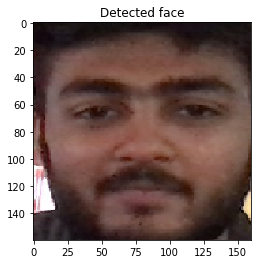

In [43]:
face_array=extract_face_mtcnn("../OpenCV/images/root.jpg")

## Using OpenCV's deep learning based face detector

### Import neccessary packages

In [23]:
import os
import cv2
import imutils

### Import detector from storage

In [24]:
# 2. Face Detection using OpenCV's deep learning based face detector
# 2.1. Load serialized face detector from disk


print("[INFO] loading face detector...")
protoPath = os.path.sep.join(["face_detection_model", "deploy.prototxt"])
modelPath = os.path.sep.join(["face_detection_model",
                             "res10_300x300_ssd_iter_140000.caffemodel"])
detector = cv2.dnn.readNetFromCaffe(protoPath, modelPath)

[INFO] loading face detector...


### Enter file to detect from

In [25]:
filename = "../OpenCV/images/root.jpg"

### Detection method

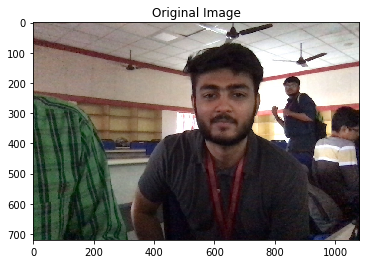

In [28]:
# def extract_face_opencv(filename):
image = cv2.imread(filename)
display_image(image, "Original Image")

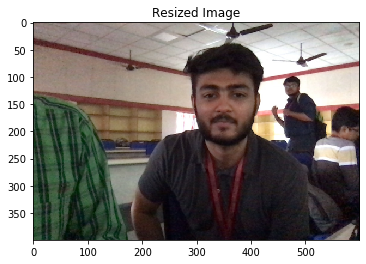

In [29]:
image = imutils.resize(image, width=600)
display_image(image, "Resized Image")